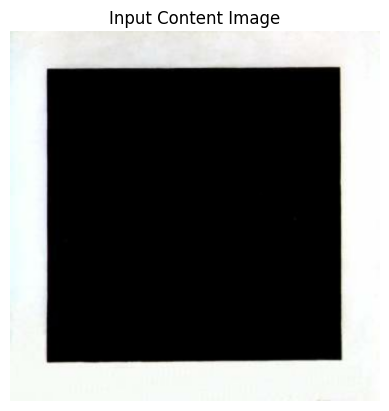

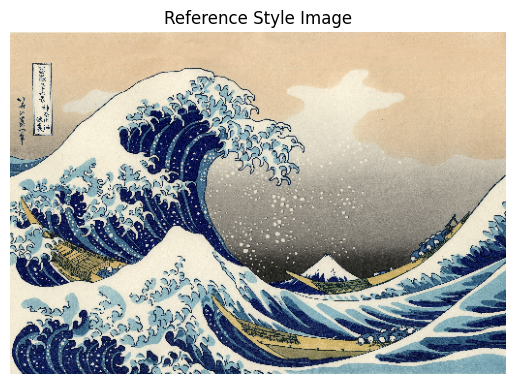

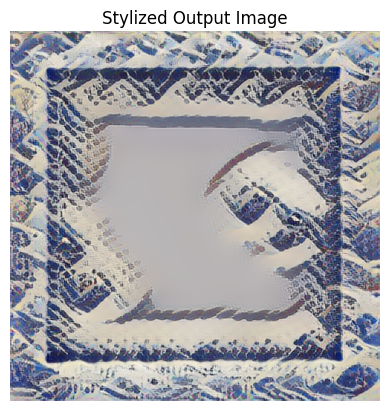

In [ ]:
# Install dependencies (run only if not already installed)
# !pip install tensorflow tensorflow_hub

# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Function to load and process the image
def load_and_process_image(image_url, max_dim=512):
    image_path = tf.keras.utils.get_file(origin=image_url)
    image_data = tf.io.read_file(image_path)
    image = tf.image.decode_image(image_data, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    shape = tf.cast(tf.shape(image)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    image = tf.image.resize(image, new_shape)
    image = image[tf.newaxis, :]  # Add batch dimension
    return image

# Function to visualize images
def show_image(img_tensor, title=''):
    if len(img_tensor.shape) == 4:
        img_tensor = tf.squeeze(img_tensor, axis=0)

    plt.imshow(img_tensor)
    plt.title(title)
    plt.axis('off')
    plt.show()

# URLs for content and style images
content_url = 'https://upload.wikimedia.org/wikipedia/commons/9/99/Black_square.jpg'
style_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg'

# Load the images
content_img = load_and_process_image(content_url)
style_img = load_and_process_image(style_url)

# Display the content and style images
show_image(content_img, 'Input Content Image')
show_image(style_img, 'Reference Style Image')

# Load the TensorFlow Hub model using hub.load()
hub_url = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
stylize_model = hub.load(hub_url)

# Stylize the image
stylized_img = stylize_model(tf.constant(content_img), tf.constant(style_img))[0]

# Display the stylized result
show_image(stylized_img, 'Stylized Output Image')